
# 项目：TMDb电影数据分析-盈利与无盈利电影的特点

## 目录
<ul>
<li><a href="#intro">简介</a></li>
<li><a href="#wrangling">数据整理</a></li>
<li><a href="#eda">探索性数据分析</a></li>
<li><a href="#conclusions">结论</a></li>
</ul>

<a id='intro'></a>
## 简介

> 本数据分析报告选择信息来源为“电影数据库”（TMDb，The Movie Database）包含1万条电影信息的数据集，包括用户评分和票房。“演职人员 (cast)”、“电影类别 (genres)”等数据列，以“_adj”结尾的最后两列表示了以2010年美元价值调整通货膨胀之后的相关电影的预算和收入。本报告按照电影的盈利情况将电影分为盈利（revenue>0）和无盈利电影（revenue=0），分别探究这两类电影在热度（popularity），评分数量（vote_count）、评分（vote_average）上所具有的特点以及盈利能力与这三个特征之间的联系，并找出两类电影中最常见的电影类别（流派）。

In [2]:
# 导入语句。
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import math
% matplotlib inline


导入必需的包以及全部的tmdb电影数据

<a id='wrangling'></a>
## 数据整理



### 常规属性

In [3]:
df=pd.read_csv('tmdb-movies.csv')
print(df.shape)
df.head()

(10866, 21)


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

查看数据的基本信息，数据类型以及缺失值情况

### 数据清理-删除冗余、缺失数据以及不必要的列

In [5]:
sum(df.duplicated())
df.drop_duplicates(inplace=True)

检查、删除冗余数据

In [6]:
df_clean=df.drop(['imdb_id','budget','director','keywords','production_companies','overview','revenue','cast','homepage','tagline','budget_adj'],axis=1)
df_clean.head(1)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 10 columns):
id                10865 non-null int64
popularity        10865 non-null float64
original_title    10865 non-null object
runtime           10865 non-null int64
genres            10842 non-null object
release_date      10865 non-null object
vote_count        10865 non-null int64
vote_average      10865 non-null float64
release_year      10865 non-null int64
revenue_adj       10865 non-null float64
dtypes: float64(3), int64(4), object(3)
memory usage: 933.7+ KB


删除与分析过程、分析结果无关的列，精简数据。

In [7]:
df_clean.dropna(axis=0,how='any',inplace=True)
df_clean.info()
df_clean.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 10 columns):
id                10842 non-null int64
popularity        10842 non-null float64
original_title    10842 non-null object
runtime           10842 non-null int64
genres            10842 non-null object
release_date      10842 non-null object
vote_count        10842 non-null int64
vote_average      10842 non-null float64
release_year      10842 non-null int64
revenue_adj       10842 non-null float64
dtypes: float64(3), int64(4), object(3)
memory usage: 931.7+ KB


,id,popularity,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,revenue_adj
0,135397,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,3.481613e+08
2,262500,13.112507,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,2.716190e+08
3,140607,11.173104,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.902723e+09
4,168259,9.335014,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.385749e+09


由于genres只有23个缺失值，对整体影响较小，所以直接删除这些缺失值所在的行。

<a id='eda'></a>
## 探索性数据分析


### 盈利电影的热度、评分数量、评分以及盈利之间的关系特点

In [8]:
df_mp=df_clean[df_clean['revenue_adj']>0]
df_mp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4849 entries, 0 to 10848
Data columns (total 10 columns):
id                4849 non-null int64
popularity        4849 non-null float64
original_title    4849 non-null object
runtime           4849 non-null int64
genres            4849 non-null object
release_date      4849 non-null object
vote_count        4849 non-null int64
vote_average      4849 non-null float64
release_year      4849 non-null int64
revenue_adj       4849 non-null float64
dtypes: float64(3), int64(4), object(3)
memory usage: 416.7+ KB


筛选出盈利电影（即revenue_adj>0），mp表示making profits

In [9]:
df_mp.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,revenue_adj
count,4849.000000,4849.000000,4849.000000,4849.000000,4849.000000,4849.000000,4.849000e+03
mean,44575.491648,1.045202,107.968035,436.283151,6.149000,2000.919777,1.151009e+08
std,72368.860461,1.356752,21.113779,806.485754,0.798707,11.569650,1.988557e+08
min,5.000000,0.001117,15.000000,10.000000,2.100000,1960.000000,2.370705e+00
25%,8285.000000,0.387740,95.000000,46.000000,5.600000,1994.000000,1.046585e+07
50%,12154.000000,0.680581,104.000000,147.000000,6.200000,2004.000000,4.395666e+07
75%,43959.000000,1.210502,117.000000,435.000000,6.700000,2010.000000,1.316482e+08
max,417859.000000,32.985763,705.000000,9767.000000,8.400000,2015.000000,2.827124e+09


简单对盈利电影的各列统计如上

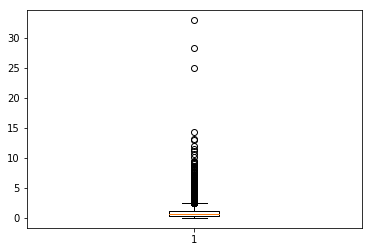

In [10]:
plt.boxplot(df_mp['popularity']);

利用箱线图显示热度数据的分布，显示热度（popularity）的箱线图非常奇怪，限制线以外有很多异常值。结合着上面简单的统计，可以发现有很多电影的知名度非常高，而大部分电影的热度主要集中在0.2-1.2之间，而知名度很高的电影的热度在5以上，由于这类电影真实存在，因此不能简单删除，需要对该数据进行进一步的处理。

In [11]:
print(df_mp['popularity'].describe())
bin_edges=[0.001116,0.387740,0.680581,1.210502,32.98577]
bin_names=[1,2,3,4]
df_mp['popularity_level']=pd.cut(df['popularity'],bin_edges,labels=bin_names)
df_mp['popularity_level']=df_mp['popularity_level'].astype(int)

count    4849.000000
mean        1.045202
std         1.356752
min         0.001117
25%         0.387740
50%         0.680581
75%         1.210502
max        32.985763
Name: popularity, dtype: float64


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


由于不同电影的popularity的差异可以很大，不能单纯将偏差过大的popularity当作异常值，
大部分电影的popularity很集中（0-1.5），且与一些少数知名电影（5-32）偏差过大，
这会导致散点图中大部分点过于集中，难以看出趋势，因此需要按照分位数将popularity划分为四个level，
以便能从散点图中直观看出趋势。

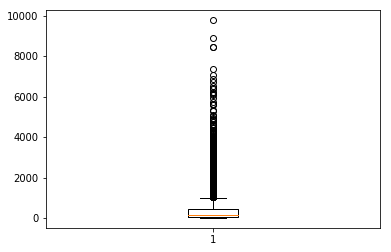

In [12]:
plt.boxplot(df_mp['vote_count']);

利用箱线图显示评分数量的分布，显示评分数量（votecount）的箱线图与热度的箱线图相似，一样奇怪，限制线以外有很多异常值。结合着上面简单的统计，可以发现有很多电影的评分数量非常高，而大部分电影的评分数量主要集中在10-435之间，而一些电影的评分在1000以上，由于这类电影真实存在，因此不能简单删除，需要对该数据进行进一步的处理。

In [13]:
print(df_mp['vote_count'].describe())
bin_edges1=[9,46,147,435,9768]
bin_names1=[1,2,3,4]
df_mp['votecount_level']=pd.cut(df['vote_count'],bin_edges1,labels=bin_names1)
df_mp['votecount_level']=df_mp['votecount_level'].astype(int)

count    4849.000000
mean      436.283151
std       806.485754
min        10.000000
25%        46.000000
50%       147.000000
75%       435.000000
max      9767.000000
Name: vote_count, dtype: float64


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


这部分代码的功能同上，因为vote_count的数据性质与popularity的性质类似。

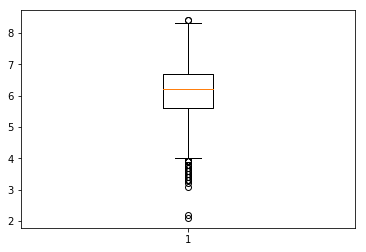

In [14]:
plt.boxplot(df_mp['vote_average']);

利用箱线图显示评分的分布，显示评分主要分布在4-8分之间。

In [15]:
print(df_mp.groupby('popularity_level')['revenue_adj'].mean())
print(df_mp.groupby('popularity_level')['vote_average'].mean())

popularity_level
1    3.110518e+07
2    5.232357e+07
3    1.005521e+08
4    2.764745e+08
Name: revenue_adj, dtype: float64
popularity_level
1    5.946040
2    5.996455
3    6.124340
4    6.529290
Name: vote_average, dtype: float64


利用groupby语句按照popularity_level对各组的盈利和评分求平均值。
从结果直观看出，流行度与盈利多少和评分的高低成正相关。

In [16]:
print(df_mp.groupby('votecount_level')['revenue_adj'].mean())
print(df_mp.groupby('votecount_level')['vote_average'].mean())

votecount_level
1    2.358139e+07
2    4.803622e+07
3    1.031252e+08
4    2.860892e+08
Name: revenue_adj, dtype: float64
votecount_level
1    5.863097
2    5.992428
3    6.146071
4    6.595623
Name: vote_average, dtype: float64


利用groupby语句按照votecount_level对各组的盈利和评分求平均值。
从结果直观看出，评价的数量与盈利多少和评分的高低成正相关。
评分数量和流行度这两个指标的结果类似

In [17]:
mp_genres=[]
for i in df_mp['genres'].str.split('|').str:
    mp_genres.append(i)

对盈利电影的流派（genres）数据进行处理，将复合流派字段拆分成单个，存储在mp_genres列表里
但是复合流派是以列表的形式存储在mp_genres列表中的，因此还需进一步处理

In [18]:
def splitlist(list):
    alist=[]
    a=0
    for sublist in list:
        try:
            for i in sublist:
                alist.append(i)
        except TypeError:
            alist.append(sublist)
    for i in alist:
        if type(i)==type([]):
            a=+1
            break
    if a==1:
        return splitlist(alist)
    if a==0:
        return alist   

定义一个splitlist函数，可以拆分列表中的列表，确保返回的最终列表中只有单一的元素不含列表。

In [19]:
mp_genres_clean=splitlist(mp_genres)
print(pd.value_counts(mp_genres_clean))

Drama              2274
Comedy             1771
Thriller           1423
Action             1260
Romance             877
Adventure           843
Crime               773
Science Fiction     586
Horror              561
Family              513
Fantasy             461
Mystery             410
Animation           237
Music               186
History             153
War                 137
Documentary         102
Western              65
Foreign              31
TV Movie              1
dtype: int64


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


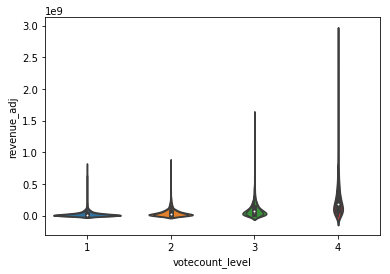

In [20]:
#作图观察结果
import seaborn as sns
print(sns.violinplot(x='popularity_level',y='revenue_adj',data=df_mp))
print(sns.violinplot(x='votecount_level',y='revenue_adj',data=df_mp))


对所有盈利电影所具有的流派的统计结果显示，属于drama，comedy，thriller，action和romance的盈利电影最多

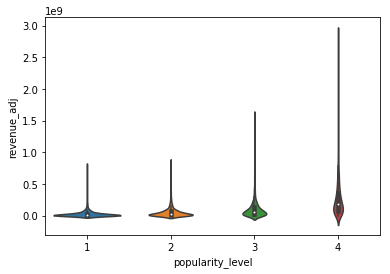

In [21]:
sns.violinplot(x='popularity_level',y='revenue_adj',data=df_mp)

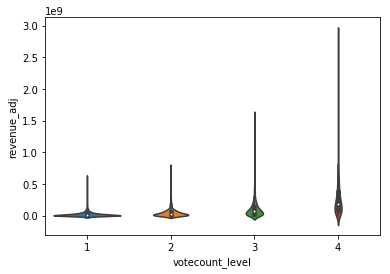

In [22]:
sns.violinplot(x='votecount_level',y='revenue_adj',data=df_mp)

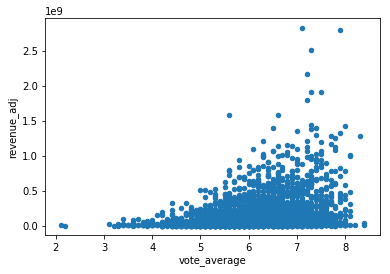

In [23]:
df_mp.plot(x='vote_average',y='revenue_adj',kind='scatter')

散点图和小提琴图显示revenue_adj与vote average，votecount level和popularity level都具有正相关
也就说明评分、评分数量和流行度都与该部电影的盈利存在正相关关系

### 对比盈利电影，探究无盈利电影所具有的特点

In [24]:
df_nmp=df_clean[df_clean['revenue_adj']==0]
df_nmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5993 entries, 48 to 10865
Data columns (total 10 columns):
id                5993 non-null int64
popularity        5993 non-null float64
original_title    5993 non-null object
runtime           5993 non-null int64
genres            5993 non-null object
release_date      5993 non-null object
vote_count        5993 non-null int64
vote_average      5993 non-null float64
release_year      5993 non-null int64
revenue_adj       5993 non-null float64
dtypes: float64(3), int64(4), object(3)
memory usage: 515.0+ KB


In [25]:
df_nmp.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,revenue_adj
count,5993.000000,5993.000000,5993.000000,5993.000000,5993.000000,5993.000000,5993.0
mean,83100.835141,0.325644,97.421659,41.065743,5.832521,2001.634407,0.0
std,102009.760440,0.303389,36.897911,67.317887,1.009075,13.730575,0.0
min,17.000000,0.000065,0.000000,10.000000,1.500000,1960.000000,0.0
25%,14305.000000,0.147319,88.000000,13.000000,5.200000,1996.000000,0.0
50%,29756.000000,0.262531,95.000000,21.000000,5.900000,2007.000000,0.0
75%,117369.000000,0.419759,106.000000,40.000000,6.500000,2012.000000,0.0
max,414419.000000,8.411577,900.000000,1143.000000,9.200000,2015.000000,0.0


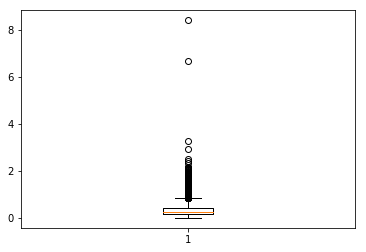

In [26]:
plt.boxplot(df_nmp['popularity']);

无盈利电影热度的箱线图，显示热度主要分布在0-0.5范围。较多异常值，与盈利电影类似。

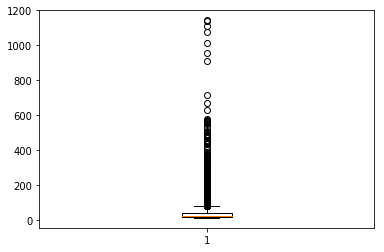

In [27]:
plt.boxplot(df_nmp['vote_count']);

无盈利电影评分数量的箱线图，显示评分数量主要分布在10-40范围。较多异常值，与盈利电影类似。

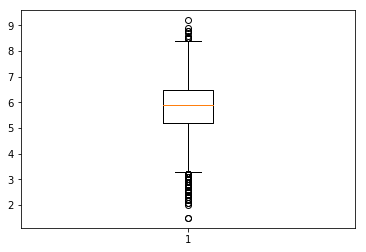

In [28]:
plt.boxplot(df_nmp['vote_average']);

无盈利电影评分的箱线图，显示评分主要分布在3-8范围。相比于盈利电影有较多评分异常值。

从简单的统计分析可以看出，无盈利的电影在流行度，评分数量和评分上明显落后于盈利电影。

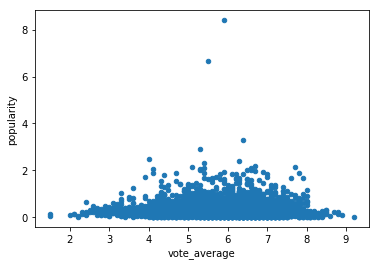

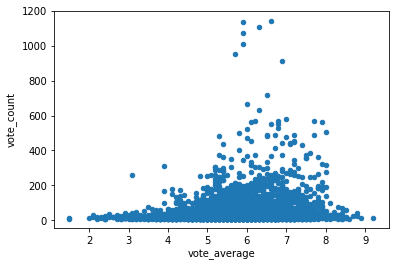

In [29]:
df_nmp.plot(x='vote_average',y='popularity',kind='scatter')
df_nmp.plot(x='vote_average',y='vote_count',kind='scatter')

从散点图中发现一个奇怪的现象，评分与评分数量和流行度之间先是正相关，
评分高过6之后就呈现负相关了。与盈利电影分析中的相互之间的正相关有差别。

In [30]:
df_nmp_hv=df_nmp[df_nmp['vote_average']>=6.0]
df_nmp_hv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2818 entries, 75 to 10863
Data columns (total 10 columns):
id                2818 non-null int64
popularity        2818 non-null float64
original_title    2818 non-null object
runtime           2818 non-null int64
genres            2818 non-null object
release_date      2818 non-null object
vote_count        2818 non-null int64
vote_average      2818 non-null float64
release_year      2818 non-null int64
revenue_adj       2818 non-null float64
dtypes: float64(3), int64(4), object(3)
memory usage: 242.2+ KB


选出评分在6.0以上的电影

In [31]:
df_nmp_hv.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,revenue_adj
count,2818.000000,2818.000000,2818.000000,2818.000000,2818.000000,2818.000000,2818.0
mean,77551.646913,0.324306,99.890703,47.870830,6.673066,1999.833215,0.0
std,99678.720414,0.285723,49.197097,77.875585,0.531609,14.921563,0.0
min,21.000000,0.000065,0.000000,10.000000,6.000000,1960.000000,0.0
25%,13551.750000,0.139894,87.000000,14.000000,6.200000,1992.000000,0.0
50%,27131.500000,0.256680,98.000000,23.000000,6.600000,2006.000000,0.0
75%,91577.250000,0.421779,111.000000,47.000000,7.000000,2011.000000,0.0
max,414419.000000,3.280948,900.000000,1143.000000,9.200000,2015.000000,0.0


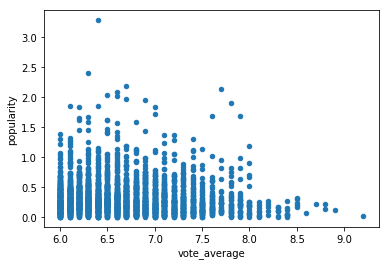

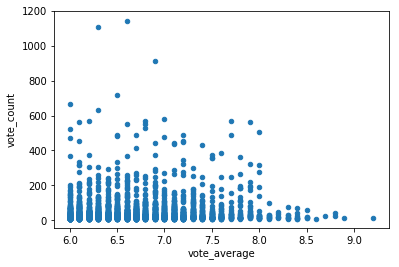

In [32]:
df_nmp_hv.plot(x='vote_average',y='popularity',kind='scatter')
df_nmp_hv.plot(x='vote_average',y='vote_count',kind='scatter')

散点图显示评分6以上的电影，评分与评分数量和流行度呈现负相关。
推断有以下几点原因：
（1）评分的数量较少，可能存在小样本偏差，导致评分不准确；
（2）可能是由于影片的特征所致，例如一些高质量的文艺片，很难能吸引社会大众的关注获得盈利，但影片的质量却属上乘

In [33]:
nmp_genres=[]
for i in df_nmp['genres'].str.split('|').str:
    nmp_genres.append(i)

In [34]:
nmp_genres_clean=splitlist(nmp_genres)
print(pd.value_counts(nmp_genres_clean))    

Drama              2486
Comedy             2022
Thriller           1484
Action             1124
Horror             1076
Romance             835
Family              718
Science Fiction     643
Adventure           628
Crime               581
Animation           462
Fantasy             455
Documentary         418
Mystery             400
Music               222
History             181
TV Movie            166
Foreign             157
War                 133
Western             100
dtype: int64


对所有盈利电影所具有的流派的统计结果显示，属于drama，comedy，thriller，action和horror的盈利电影最多
无盈利电影与盈利电影在题材上可以说相差不大。

<a id='conclusions'></a>
## 结论

> 盈利电影具有较高的热度，评论数量和评分，且盈利电影的热度、评论数量、评分两两成正相关。这三个变量都与电影盈利的多少成正相关。盈利电影最常见的五个流派分别是：戏剧、喜剧、惊悚、动作、浪漫。

> 无盈利电影的热度、评论数量和评分都显著低于盈利电影，其评分与热度和评论数量的关系较特别--低评分正相关，高评分负相关。高评分低热度可能是由于样本小，评分不具有代表性，也可能是由于高评分电影质量上乘，但不能迎合大众品味，如部分探索型先驱文艺片。无盈利电影最常见的五个流派分别是：戏剧、喜剧、惊悚、动作、恐怖，与盈利电影相差不大。

> 电影是否盈利与热度、评分和评论数量有很强的相关性。很容易理解，大众更愿意选择观看质量上乘，又具有广泛话题度的电影，同时也进一步提高了对应电影的热度、评分和评论数量，电影也更有可能获得盈利。

> 局限性：我对这个数据的有些地方有一些疑问，为什么有的电影的预算是零。我刚开始猜想是因为太过久远，资料不全面导致，因此初期处理的时候删除了所有预算为零的行，但是发现删完之后损失了一半左右的数据。后来我认为可能是因为这些电影没有获得足够的投资（有可能根本没拍），如果是资料不全面应该是数据缺失而不是为零。但是对数据背后的原因和细节的不了解可能会使本报告中的一些统计和结论的可靠性遭致削弱。

In [35]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255